In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100

In [2]:
df = pd.read_csv("exe_w_ssdeep.csv")

In [3]:
df.head()

,exe name,Family,scan_date,first_seen,last_seen,total,positives,ssdeep,yara packing detection,yara matching rule
0,4bf4bc2c3309458670687f7f35a034e87726c0b2b4ce59...,teslacrypt,2016-09-18 11:15:50,2016-03-22 05:29:56,2016-07-19 11:25:46,57,47,6144:bZ6bJnUPNKASkonBh2H5um+WoqhRXysUHPBBSS:bZ...,True,"[Armadillo_v171, Microsoft_Visual_Cpp_v60, Mic..."
1,40c21b4b4e34ff73b2d6e141fea09c2b46651f419fd0fe...,bitman,2017-07-06 00:25:10,2017-07-06 00:25:10,2017-07-06 00:25:10,62,48,12288:judHVXOAV1OuWJqOnnIc3F/Erjfgl8wzY9Ld:jKV...,True,"[VC8_Microsoft_Corporation, Microsoft_Visual_C..."
2,6422faf6d7445192bb4f672b492b607d067a8eaf301d4e...,locky,2017-06-12 16:30:30,2017-02-09 11:42:10,2017-06-12 16:30:30,61,51,6144:oATuEQVmmQzJ5kK9ip7LFXDjKS8+j+K/r9dSmzvTt...,True,"[VC8_Microsoft_Corporation, Microsoft_Visual_C..."
3,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,2016-03-08 15:24:24,2016-03-08 15:24:24,2016-03-08 15:24:24,56,26,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,True,"[IsPE32, IsConsole, IsPacked, HasRichSignature]"
4,2635cf5674e1fab231c419c5f95b4df6e3c42c3ad4287f...,midie,2016-02-11 11:35:26,2016-02-11 11:35:26,2016-02-11 11:35:26,54,32,6144:0rLLnn8QfNsObzjHWsAbIRagplMM+apLUUWw3zrlF...,True,"[VC8_Microsoft_Corporation, Microsoft_Visual_C..."


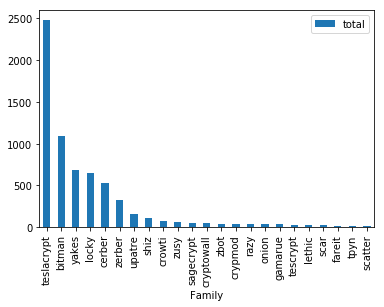

In [4]:
family_groupby = df.groupby('Family').count()
a = pd.DataFrame(family_groupby['total'])
a.sort_values(by=['total'], inplace=True, ascending=False)
a = a[a['total'] > 10]
ax = a[['total']].plot(kind='bar')
fig = ax.get_figure()
fig.savefig('figure1.png')

In [5]:
a = df.groupby(['yara matching rule'])['total']
a = pd.DataFrame(a.count())

In [6]:
a.sort_values(by=['total'], ascending=False, inplace=True)
a = a[a['total'] > 10]
a

,total
yara matching rule,
"[Armadillo_v171, Microsoft_Visual_Cpp_v60, Microsoft_Visual_Cpp_v50v60_MFC_additional, Microsoft_Visual_Cpp_50, Microsoft_Visual_Cpp_v50v60_MFC, Armadillo_v171_additional, Microsoft_Visual_Cpp, IsPE32, IsWindowsGUI, HasOverlay, HasRichSignature]",1030
"[Armadillo_v171, Microsoft_Visual_Cpp_v60, Microsoft_Visual_Cpp_v50v60_MFC_additional, Microsoft_Visual_Cpp_50, Microsoft_Visual_Cpp_v50v60_MFC, Armadillo_v171_additional, Microsoft_Visual_Cpp, IsPE32, IsWindowsGUI, HasRichSignature]",790
"[IsPE32, IsWindowsGUI, IsPacked, HasDebugData, HasRichSignature]",590
"[VC8_Microsoft_Corporation, Microsoft_Visual_Cpp_8, IsPE32, IsWindowsGUI, HasRichSignature]",483
"[IsPE32, IsConsole, IsPacked, HasRichSignature]",413
"[IsPE32, IsWindowsGUI, IsPacked, HasOverlay, HasRichSignature]",361
"[Microsoft_Visual_Cpp_V80_Debug, Microsoft_Visual_Cpp_80_Debug_, Microsoft_Visual_Cpp_80_Debug, IsPE32, IsConsole, HasRichSignature]",290
"[Armadillo_v171, Microsoft_Visual_Cpp_v60, Microsoft_Visual_Cpp_v50v60_MFC_additional, Microsoft_Visual_Cpp_50, Microsoft_Visual_Cpp_v50v60_MFC, Armadillo_v171_additional, Microsoft_Visual_Cpp, IsPE32, IsWindowsGUI, IsPacked, HasRichSignature]",287
"[IsPE32, IsConsole, IsPacked, HasDebugData, HasRichSignature]",273


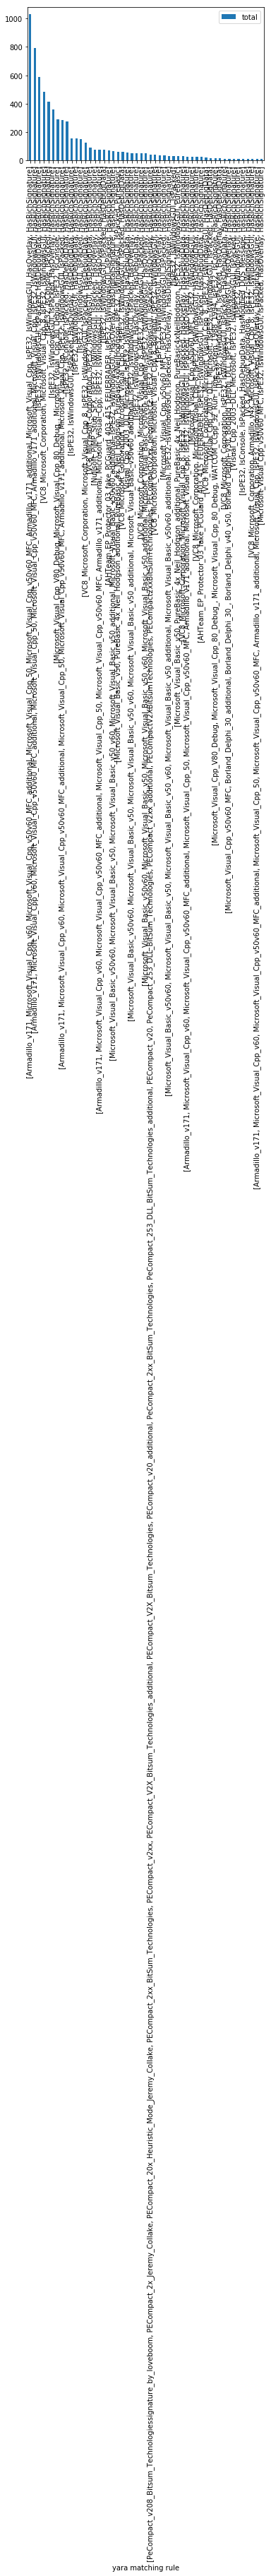

In [7]:
ax = a[['total']].plot(kind='bar')
fig = ax.get_figure()
fig.savefig('figure2.png')